In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
# Reading the Dataset
df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the number is nulls's in the dataset and there are none
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# There are 730 rows in the Dataset
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Extracting Year and Month from dteday
df['year'] = pd.to_datetime(df['dteday'],format="mixed",dayfirst=True).dt.year
df['month'] = pd.to_datetime(df['dteday'],format='mixed',dayfirst=True).dt.month


df = df.drop(['yr','mnth'],axis=1)

Data Analysis

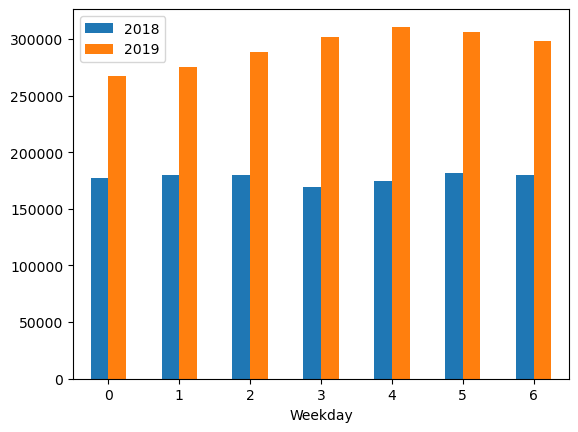

In [9]:
# Trend of Sales by Year and Weekday 
tempdf = pd.pivot_table(data=df,index=['weekday'],columns='year',values='cnt',aggfunc='sum')

tempdataframe = pd.DataFrame({'Weekday': tempdf.index,'2018':tempdf[2018],'2019':tempdf[2019]})
tempdataframe.plot(x="Weekday", y=["2018", "2019"], kind="bar", rot=0)
plt.show()

#### 2019 has seen more sales compared to 2018

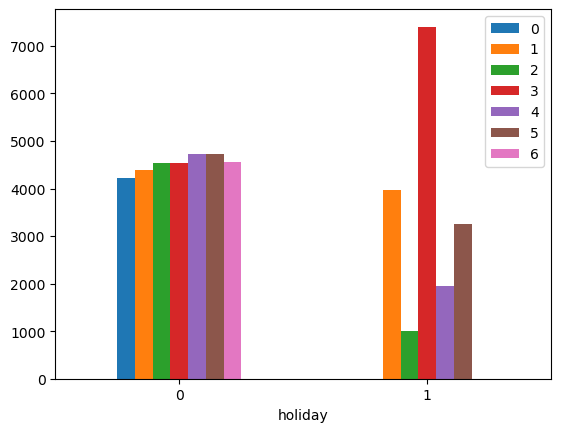

In [10]:
tempdf = pd.pivot_table(data=df,index=['holiday'],columns='weekday',values='cnt',aggfunc='mean')
tempdataframe = pd.DataFrame({'holiday': tempdf.index,'0':tempdf[0],'1':tempdf[1],'2':tempdf[2],'3':tempdf[3],'4':tempdf[4],'5':tempdf[5],'6':tempdf[6],})
tempdataframe.plot(x="holiday", y=["0", "1","2","3","4","5","6"], kind="bar", rot=0)
plt.show()

#### There is NO much impact on Sales on Holidays expect if it falls on Wednesday

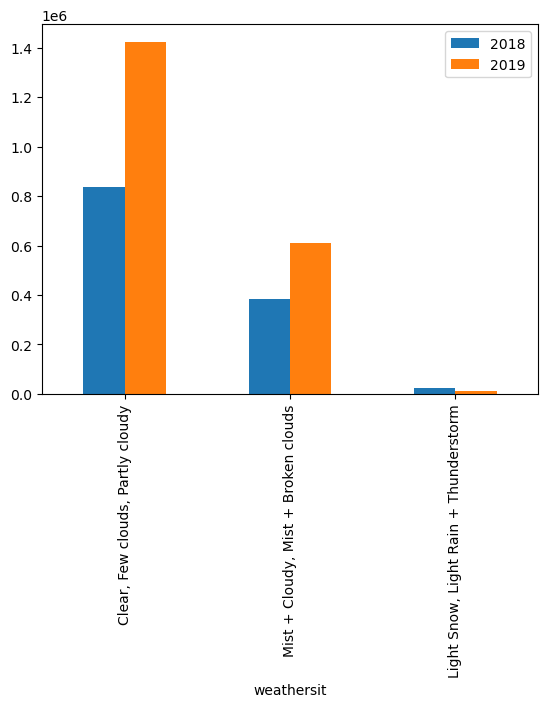

In [11]:
tempdf = pd.pivot_table(data=df,index=['weathersit'],columns='year',values='cnt',aggfunc='sum')

tempdataframe = pd.DataFrame({'weathersit': tempdf.index,'2018':tempdf[2018],'2019':tempdf[2019]})

tempdataframe['weathersit'] = tempdataframe['weathersit'].astype(str)

tempdataframe[['weathersit']] = tempdataframe[['weathersit']].apply(lambda x: x.map({'1':"Clear, Few clouds, Partly cloudy",'2':"Mist + Cloudy, Mist + Broken clouds",'3':'Light Snow, Light Rain + Thunderstorm'}))

tempdataframe.plot(x="weathersit", y=["2018", "2019"], kind="bar", rot=90)
plt.show()

####  Weather is playing a key role in the Bikes Rented. "Clear, Few clouds, Partly cloudy" are seeing the highest numbers. There is NO data for " Heavy Rain + Ice Pallets" which could mean no Bikes are taken these days

In [12]:
df['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [13]:
bins = [0,5, 10,15, 20, 25, 30, 36]
labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-36']
df['temp-binned'] = pd.cut(df['temp'], bins=bins, labels=labels)

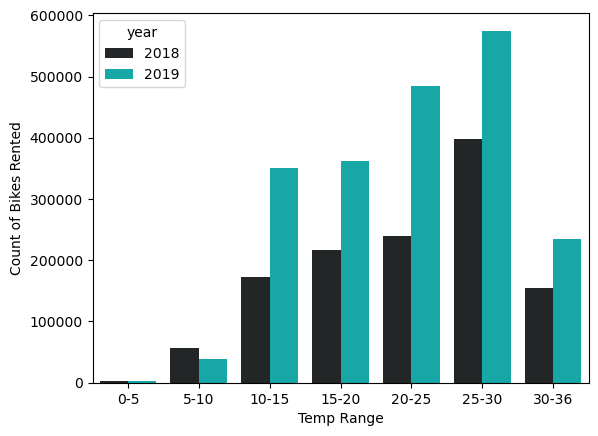

In [14]:
tempdataframe = df.groupby(['temp-binned','year'])['cnt'].sum().reset_index()
sns.barplot(tempdataframe,x='temp-binned',y='cnt',hue='year',color='c')
plt.xlabel("Temp Range")
plt.ylabel("Count of Bikes Rented")
plt.show()

#### Temperature is playing a major role on the count of bikes being rented

In [15]:
df=df.drop('temp-binned',axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  year        730 non-null    int32  
 15  month       730 non-null    int32  
dtypes: float64(4), int32(2), int64(9), object(1)
memory usage: 85.7+ KB


In [17]:
#dropping columns instant and  dteday 
#dteday: the month and year are already captured in other cols. Hence dteday makes no sense
#instantL
df = df.drop(['instant','dteday'],axis=1)

In [18]:
df.head(5)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


<Axes: xlabel='month', ylabel='cnt'>

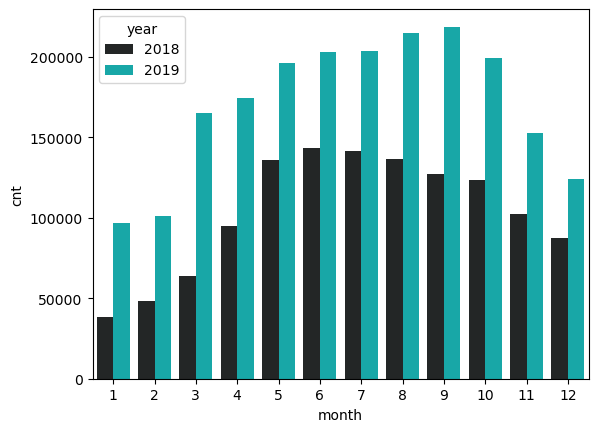

In [19]:
tempdataframe = df.groupby(['month','year'])['cnt'].sum().reset_index()
sns.barplot(tempdataframe,x='month',y='cnt',hue='year',color='c')

#### Months from May to October see high number of bike rentals

<Axes: xlabel='season', ylabel='cnt'>

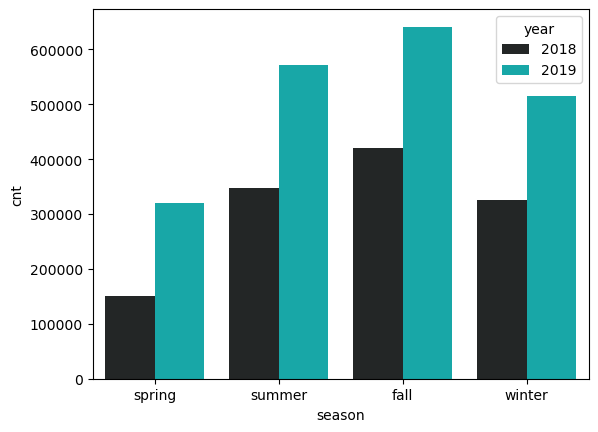

In [20]:
tempdataframe = df.groupby(['season','year'])['cnt'].sum().reset_index()
tempdataframe[['season']] = tempdataframe[['season']].apply(lambda x: x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))
,
sns.barplot(tempdataframe,x='season',y='cnt',hue='year',color='c')

#### Fall and Summer see the highest Bike Rentals

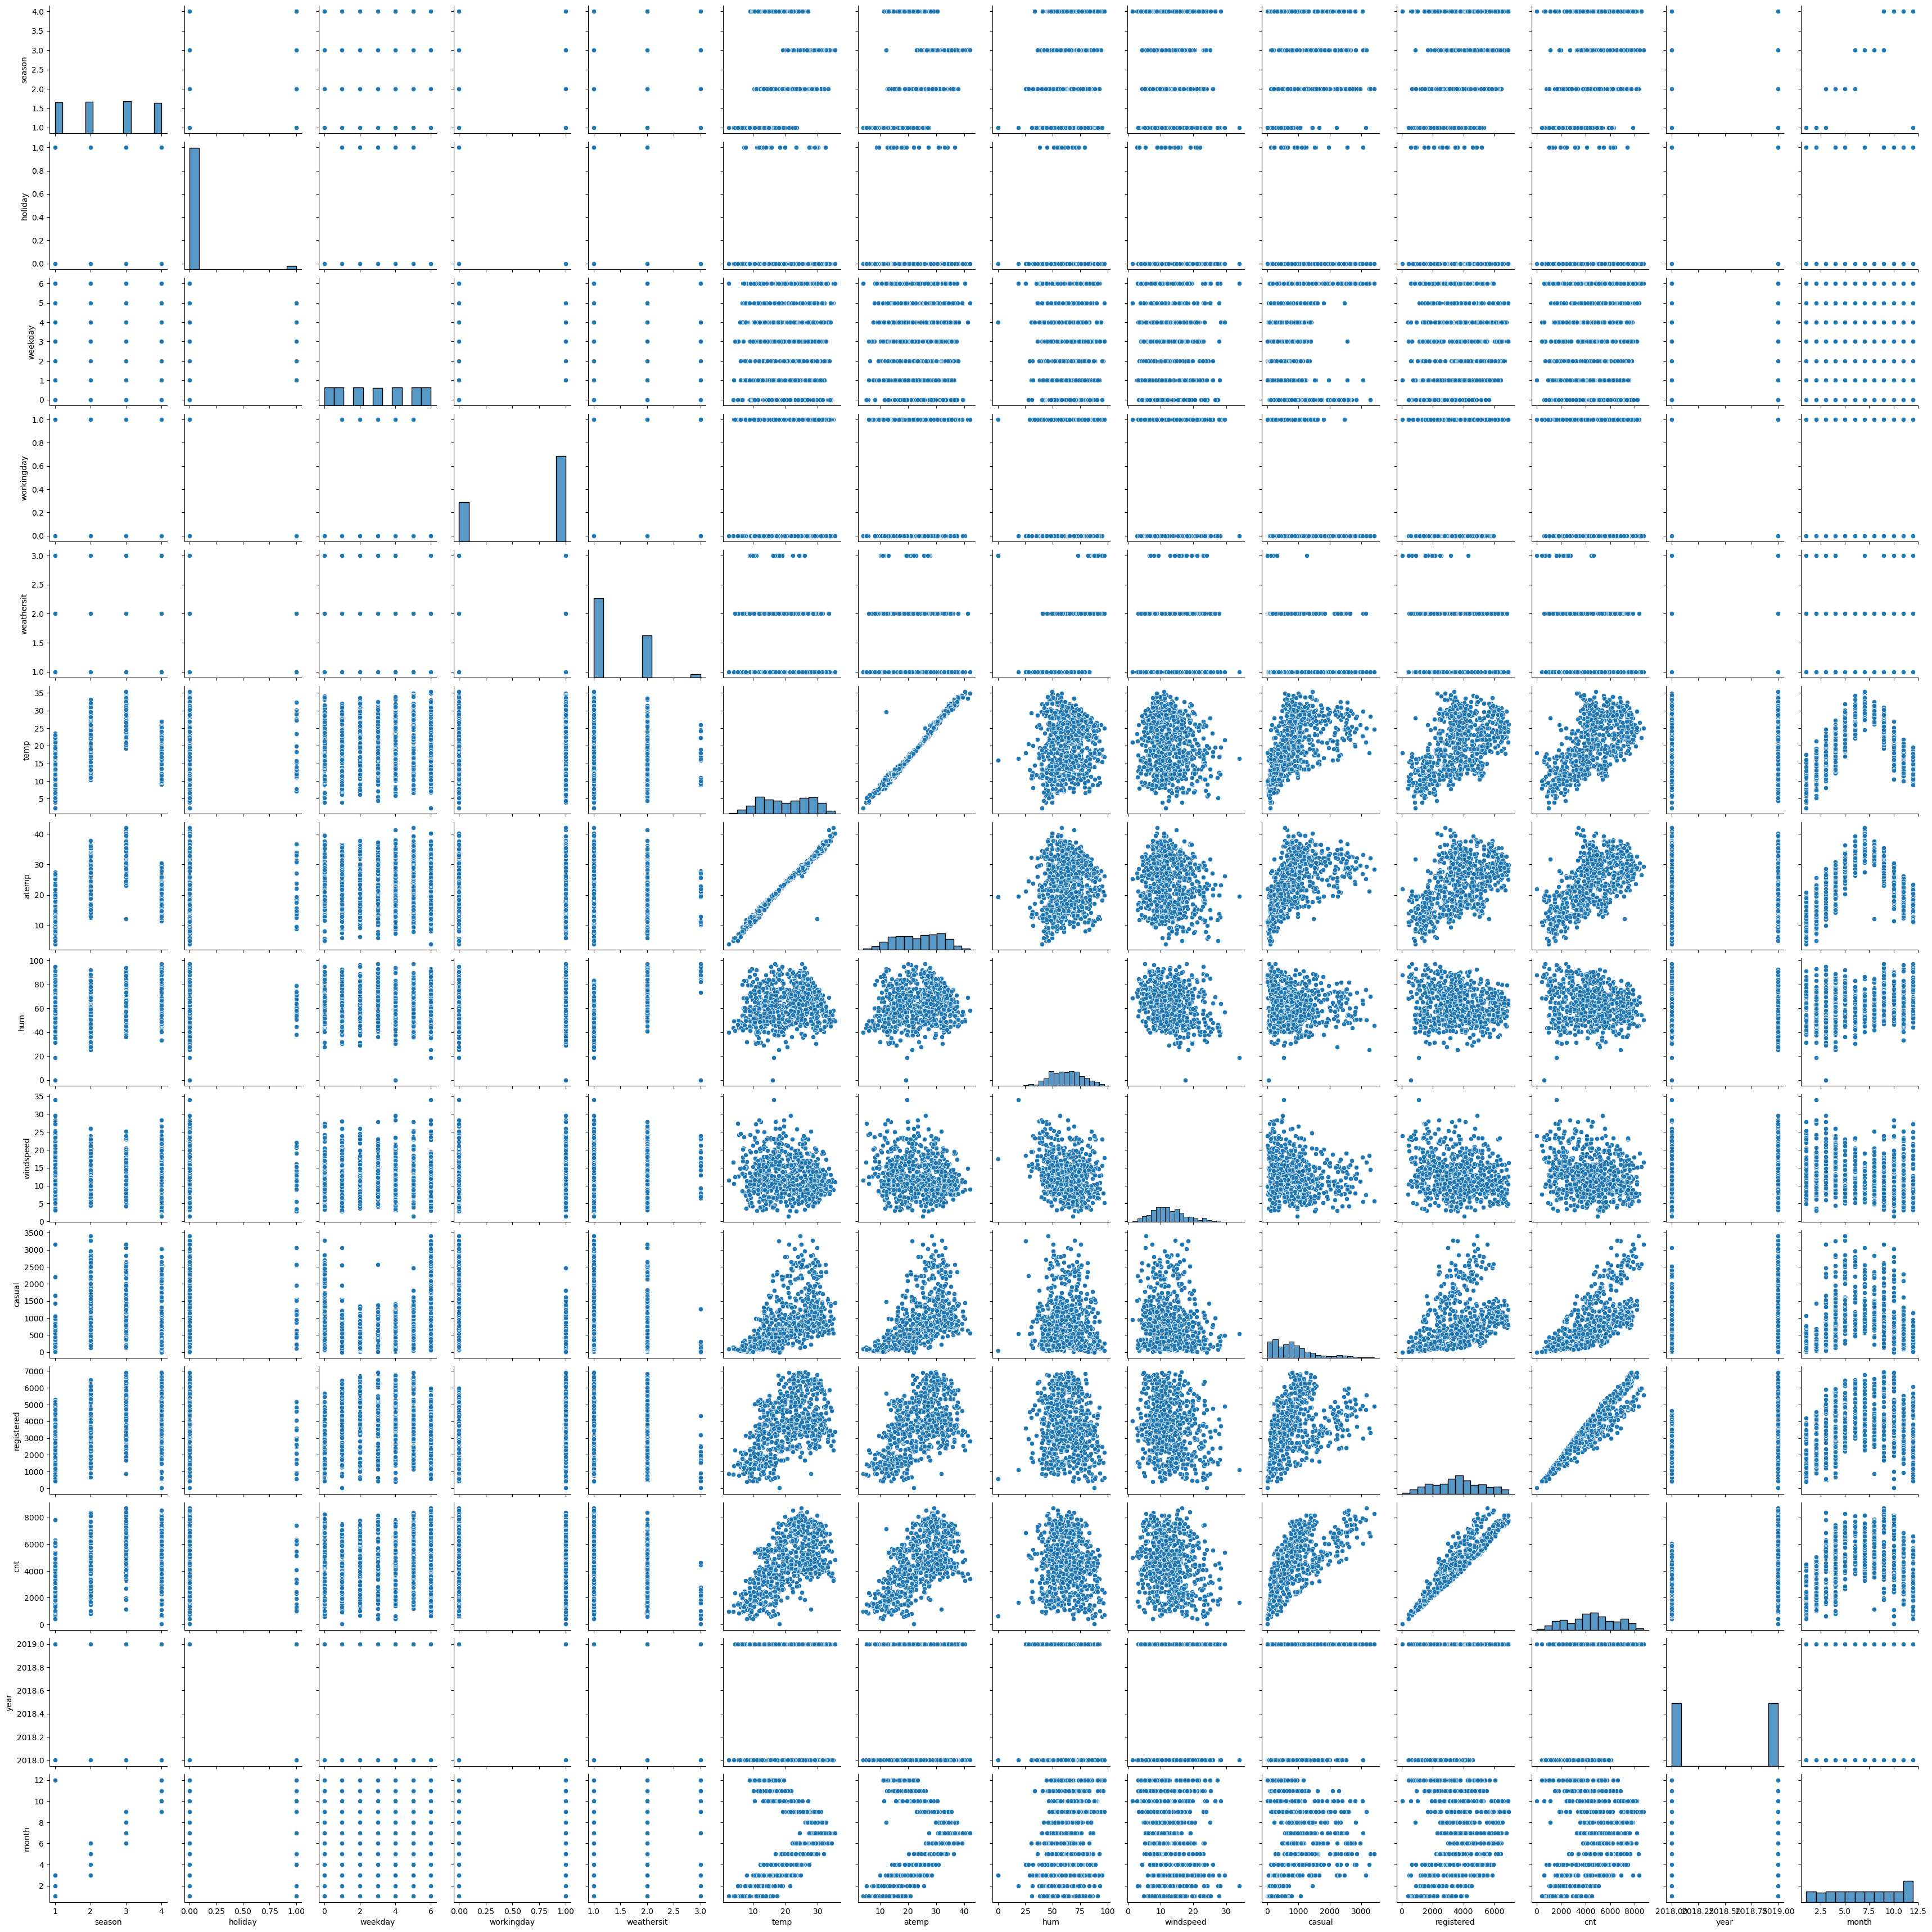

In [21]:
sns.pairplot(df)
plt.show()

<Axes: >

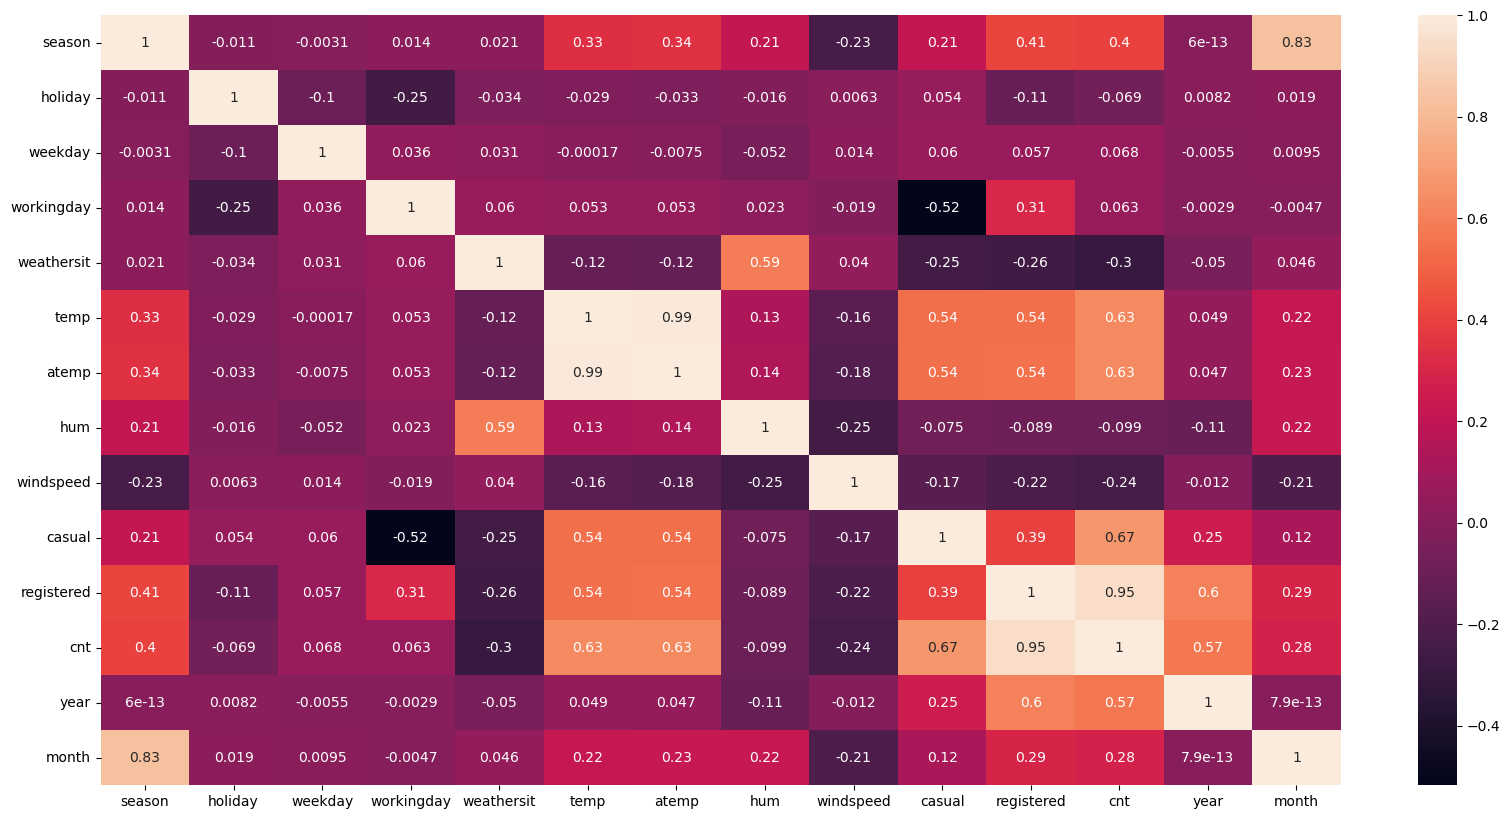

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

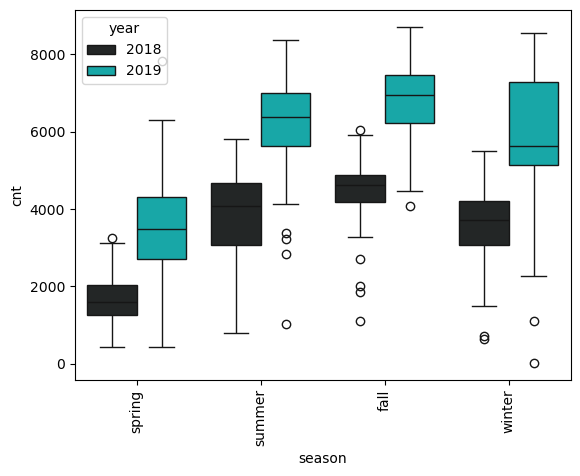

In [23]:
sns.boxplot(data=df,y='cnt',x='season',hue='year',color='c')


plt.xticks([0,1,2,3] ,['spring', 'summer', 'fall','winter'],rotation=90)

plt.show()

#### Summer and Fall see the highest bike rentals

<Axes: xlabel='year', ylabel='cnt'>

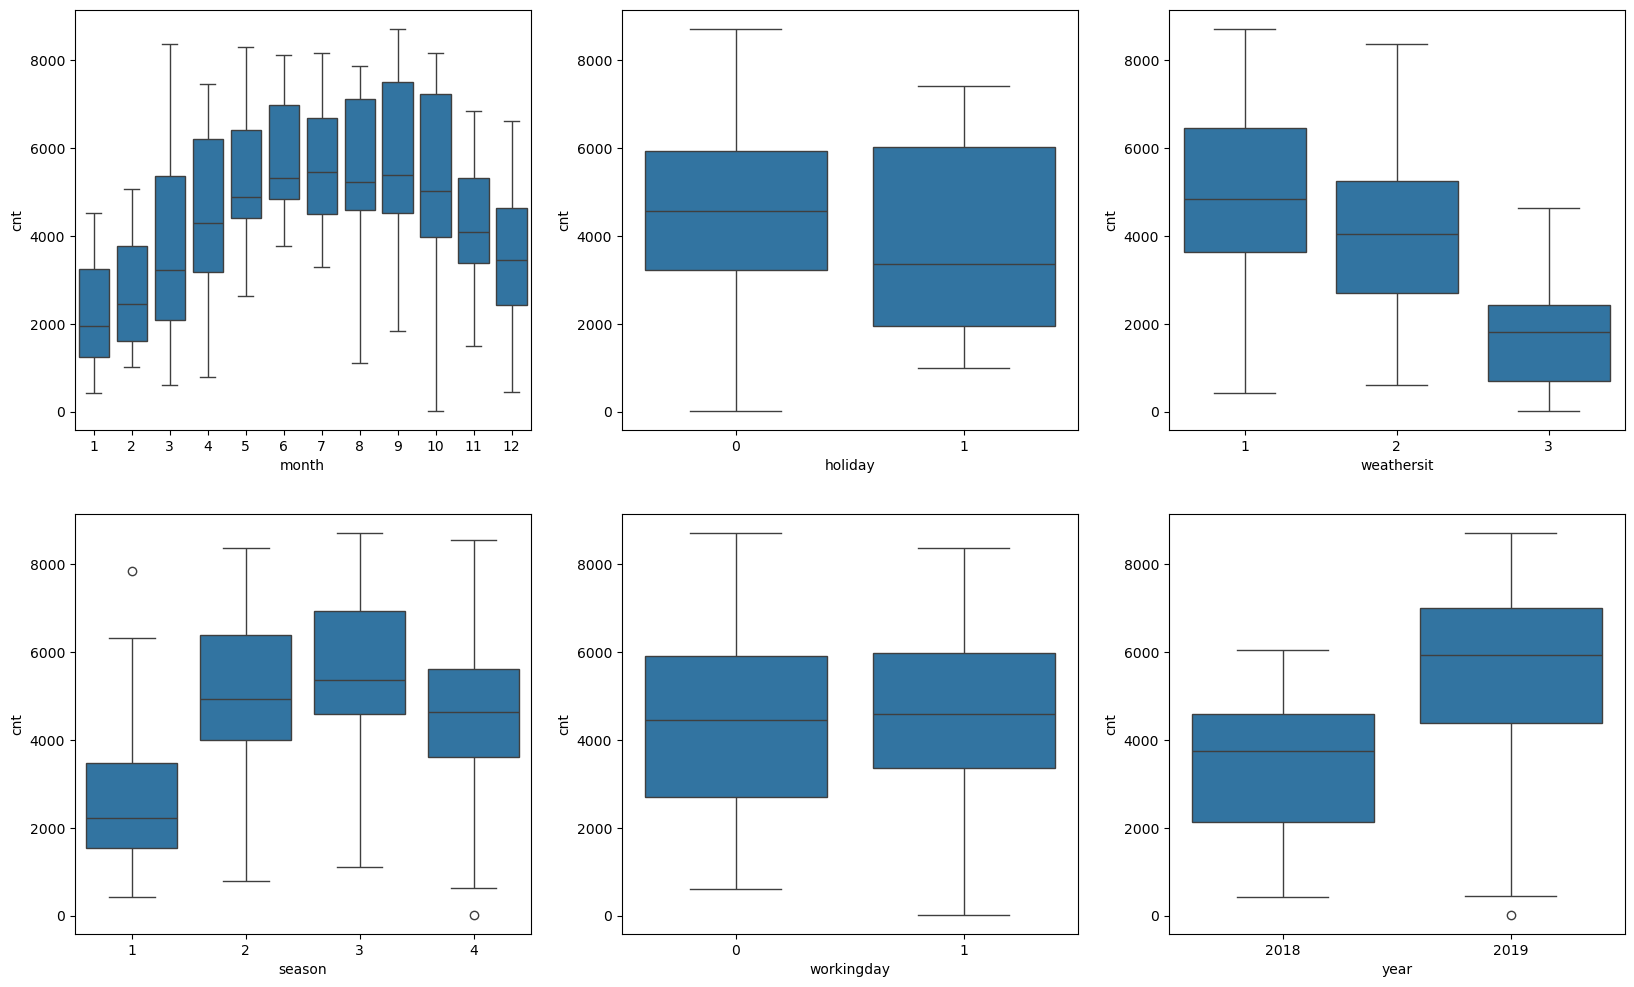

In [24]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='month',y='cnt',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='year',y='cnt',data=df)

In [25]:
# Dropping casual and registered as they are already contained in cnt. Cnt is also our target variable
df=df.drop(['casual','registered'],axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  year        730 non-null    int32  
 11  month       730 non-null    int32  
dtypes: float64(4), int32(2), int64(6)
memory usage: 62.9 KB


In [27]:
df.head(5)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [28]:
season = pd.get_dummies(df['season'],dtype=int,drop_first=True,prefix='season')
mnth = pd.get_dummies(df['month'],dtype=int,drop_first=True,prefix='month')
weekday = pd.get_dummies(df['weekday'],dtype=int,drop_first=True,prefix='weekday')
weathersit = pd.get_dummies(df['weathersit'],dtype=int,drop_first=True,prefix='weathersit')


In [29]:
df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [30]:
df = pd.concat([df,season,mnth,weekday,weathersit],axis=1)
df=df.drop(['season','month','weekday','weathersit'],axis=1)

In [31]:
df

,holiday,workingday,temp,atemp,hum,windspeed,cnt,year,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,14.110847,18.18125,80.5833,10.749882,985,2018,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,2018,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,2018,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,2018,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,2018,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,10.420847,11.33210,65.2917,23.458911,2114,2019,0,0,...,0,1,0,0,0,1,0,0,1,0
726,0,1,10.386653,12.75230,59.0000,10.416557,3095,2019,0,0,...,0,1,0,0,0,0,1,0,1,0
727,0,0,10.386653,12.12000,75.2917,8.333661,1341,2019,0,0,...,0,1,0,0,0,0,0,1,1,0
728,0,0,10.489153,11.58500,48.3333,23.500518,1796,2019,0,0,...,0,1,0,0,0,0,0,0,0,0


In [32]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=70)

In [33]:
df_test.shape

(220, 30)

In [34]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=70)

scaler = MinMaxScaler()
scaledvars = ['temp','atemp','hum','windspeed','cnt']
df_train[scaledvars] = scaler.fit_transform(df_train[scaledvars])

df_test[scaledvars] = scaler.transform(df_test[scaledvars])


In [35]:
df_test.head(5)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,year,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
625,0,1,0.703024,0.669562,0.897172,0.691023,0.466061,2019,0,1,...,0,0,0,1,0,0,0,0,1,0
572,0,1,0.900316,0.902602,0.611396,0.269239,0.791763,2019,0,1,...,0,0,0,0,0,0,1,0,0,0
201,0,1,0.941851,1.029563,0.710797,0.411546,0.432812,2018,0,1,...,0,0,0,0,0,1,0,0,1,0
148,0,0,0.758058,0.739113,0.841902,0.394883,0.548320,2018,1,0,...,0,0,0,0,0,0,0,0,0,0
512,1,0,0.814131,0.826942,0.695373,0.358977,0.692706,2019,1,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
X_train = df_train.drop('cnt',axis=1)
y_train= df_train['cnt']

 # Trainging the model with all varaibles and then removing


In [37]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const          -455.801244
holiday          -0.021776
workingday        0.036458
temp              0.260888
atemp             0.169413
hum              -0.156487
windspeed        -0.135462
year              0.225961
season_2          0.119538
season_3          0.086667
season_4          0.181620
month_2           0.010076
month_3           0.040207
month_4           0.019378
month_5           0.061354
month_6           0.033745
month_7          -0.003780
month_8           0.053042
month_9           0.108787
month_10          0.041966
month_11         -0.038599
month_12         -0.024811
weekday_1        -0.017460
weekday_2         0.002608
weekday_3         0.004062
weekday_4         0.010903
weekday_5         0.014569
weekday_6         0.034039
weathersit_2     -0.058992
weathersit_3     -0.241801
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:           

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,holiday,inf
25,weekday_5,inf
24,weekday_4,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
1,workingday,inf
2,temp,433.97
3,atemp,384.30
6,year,60.54


In [39]:


#weekday_3,weekday_2

In [40]:
# As a first step, #Temp and Atemp have very high correlection. removing temp (per heatmap it is 0.99)
X_train = X_train.drop('temp',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,holiday,inf
1,workingday,inf
24,weekday_5,inf
23,weekday_4,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
5,year,60.52
3,hum,40.61
2,atemp,38.27


In [41]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const          -457.349652
holiday          -0.018076
workingday        0.036847
atemp             0.402502
hum              -0.153268
windspeed        -0.123656
year              0.226728
season_2          0.119193
season_3          0.090231
season_4          0.182261
month_2           0.010687
month_3           0.044375
month_4           0.025580
month_5           0.073503
month_6           0.051570
month_7           0.014462
month_8           0.072214
month_9           0.120943
month_10          0.047542
month_11         -0.036906
month_12         -0.023808
weekday_1        -0.018081
weekday_2         0.002842
weekday_3         0.004841
weekday_4         0.011945
weekday_5         0.017223
weekday_6         0.034168
weathersit_2     -0.059479
weathersit_3     -0.241306
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj.

In [42]:
# removing atemp as this is having highest P Value
X_train = X_train.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())



const          -481.719212
holiday          -0.003593
workingday        0.040882
hum              -0.064465
windspeed        -0.115333
year              0.238820
season_2          0.119855
season_3          0.125564
season_4          0.204347
month_2           0.039472
month_3           0.112852
month_4           0.136693
month_5           0.232643
month_6           0.256094
month_7           0.224513
month_8           0.247068
month_9           0.259522
month_10          0.138121
month_11         -0.000485
month_12          0.001407
weekday_1        -0.015923
weekday_2         0.007024
weekday_3         0.009786
weekday_4         0.022768
weekday_5         0.013634
weekday_6         0.035834
weathersit_2     -0.075408
weathersit_3     -0.284614
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                

### The R-squared value has decreased, which means the 'atemp' field cannot be removed. Dropping 'weekday_2','holiday' given the very high VIF Value. 

In [43]:

X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','holiday','temp']



X_train = X_train.drop(dropping_cols,axis=1)



X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())




const          -457.600221
workingday        0.044173
atemp             0.400846
hum              -0.152732
windspeed        -0.123192
year              0.226851
season_2          0.119465
season_3          0.090774
season_4          0.183415
month_2           0.010361
month_3           0.044556
month_4           0.025501
month_5           0.073683
month_6           0.052312
month_7           0.014668
month_8           0.072679
month_9           0.120616
month_10          0.046567
month_11         -0.038848
month_12         -0.024646
weekday_1        -0.024967
weekday_3        -0.000488
weekday_4         0.006555
weekday_5         0.011767
weekday_6         0.036292
weathersit_2     -0.059673
weathersit_3     -0.241310
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:            

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,year,59.71
2,hum,40.59
1,atemp,38.09
6,season_3,13.20
5,season_2,9.28
13,month_7,8.48
14,month_8,8.36
7,season_4,7.97
12,month_6,7.80
0,workingday,7.20


In [45]:
# Removing 'hum' given the high VIF value and evaluating the model


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','holiday','temp','hum']



X_train = X_train.drop(dropping_cols,axis=1)


X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())



const          -465.195492
workingday        0.044685
atemp             0.360308
windspeed        -0.092868
year              0.230571
season_2          0.115095
season_3          0.090103
season_4          0.183877
month_2           0.015831
month_3           0.056036
month_4           0.039440
month_5           0.082037
month_6           0.077363
month_7           0.038310
month_8           0.086994
month_9           0.125536
month_10          0.047655
month_11         -0.037770
month_12         -0.027823
weekday_1        -0.028520
weekday_3        -0.000291
weekday_4         0.010860
weekday_5         0.013407
weekday_6         0.038636
weathersit_2     -0.084283
weathersit_3     -0.288667
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-stat

### Removing 'hum' is causing the overall R-squared to be reduced. Hence cannot be removed
### 'mnth_7','weekday_3' has high P-Value hence dropping them

In [52]:

X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','holiday','temp','month_7','weekday_3']



X_train = X_train.drop(dropping_cols,axis=1)



X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())


const          -457.070611
workingday        0.043667
atemp             0.409145
hum              -0.154773
windspeed        -0.123534
year              0.226589
season_2          0.122852
season_3          0.096970
season_4          0.185892
month_2           0.008148
month_3           0.040221
month_4           0.018205
month_5           0.065395
month_6           0.041915
month_8           0.060557
month_9           0.110355
month_10          0.040158
month_11         -0.044221
month_12         -0.028511
weekday_1        -0.024828
weekday_4         0.006544
weekday_5         0.012155
weekday_6         0.036076
weathersit_2     -0.059521
weathersit_3     -0.240678
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 692 to 334
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       510 non-null    int64  
 1   workingday    510 non-null    int64  
 2   temp          510 non-null    float64
 3   atemp         510 non-null    float64
 4   hum           510 non-null    float64
 5   windspeed     510 non-null    float64
 6   year          510 non-null    int32  
 7   season_2      510 non-null    int32  
 8   season_3      510 non-null    int32  
 9   season_4      510 non-null    int32  
 10  month_2       510 non-null    int32  
 11  month_3       510 non-null    int32  
 12  month_4       510 non-null    int32  
 13  month_5       510 non-null    int32  
 14  month_6       510 non-null    int32  
 15  month_7       510 non-null    int32  
 16  month_8       510 non-null    int32  
 17  month_9       510 non-null    int32  
 18  month_10      510 non-null    int

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

# Residual Analysis

In [ ]:
y_train_pred = lrmodel.predict(X_train_sm)
sns.displot(y_train-y_train_pred)

# Predictions and Evaluations on the test set

In [ ]:
X_test = df_test.drop(['cnt'],axis=1)
y_test = df_test['cnt']

X_test = X_test.drop(dropping_cols,axis=1)

X_test_sm = sm.add_constant(X_test)
y_test_pred = lrmodel.predict(X_test_sm)

r2_score(y_test,y_test_pred)


In [ ]:
r2_score(y_train,y_train_pred)


In [ ]:

# X_train = df_train.drop(['cnt'],axis=1)
# y_train= df_train['cnt']

# dropping_cols = ['weekday_2','holiday','temp','mnth_7','weekday_3']



# X_train = X_train.drop(dropping_cols,axis=1)


# X_train_sm = sm.add_constant(X_train)
# lr = sm.OLS(y_train,X_train_sm)
# lrmodel = lr.fit()
# print (lrmodel.params)
# print(lrmodel.summary())

In [ ]:
# vif = pd.DataFrame()
# vif['Features'] = X_train.columns
# vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
# vif['VIF'] = round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

In [ ]:


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']


lm=LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, step=8)
rfe = rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

X_train.columns[rfe.support_]

X_train = X_train[X_train.columns[rfe.support_]]

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

In [ ]:
# vif = pd.DataFrame()
# vif['Features'] = X_train.columns
# vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
# vif['VIF'] = round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

In [ ]:
# #removing Holiday, weekday_2 and weekday_3 given High P and VIF
# X_train = X_train.drop(['holiday','weekday_3','weekday_2'],axis=1)
# X_train_sm = sm.add_constant(X_train)
# lr = sm.OLS(y_train,X_train_sm)
# lrmodel = lr.fit()
# print (lrmodel.params)
# print(lrmodel.summary())

In [ ]:
# vif = pd.DataFrame()
# vif['Features'] = X_train.columns
# vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
# vif['VIF'] = round(vif['VIF'],2)
# vif=vif.sort_values(by='VIF',ascending=False)
# vif

In [ ]:
# # Removing 'hum' given the high VIF value

# X_train = X_train.drop(['hum'],axis=1)
# X_train_sm = sm.add_constant(X_train)
# lr = sm.OLS(y_train,X_train_sm)
# lrmodel = lr.fit()
# print (lrmodel.params)
# print(lrmodel.summary())